In [2]:
from src import *

## Description

We are mainly empirically comparing Jaccknife sampling versus fixed sliding window.

GOAL: Compare methods and select the most time resolute (best time resolution) while having smooth dynamic connectivity

## Table of Contents
- [Rest types comparison](#rest)

- [Movie types comparison](#movie)

### Rest types comparison

In [5]:
mri_path = "./data/fmri400_compiled/Rest_compiled.csv"
mri_df   = pd.read_csv(mri_path)
filename_rest        = 'TC_400_sub-S23_ses-1_Rest.csv'
rest_series, rest_df = df_to_timeseries(mri_df, filename_rest)

In [8]:
# variable for dFC
ws   = 40
step = 1 # let's overlap pretty much all for now to see smoothness
nbr, nbt = rest_series.T.shape

In [9]:
dFC_rest = np.zeros((nbt // step + 1 - ws, nbr,nbr))

for c, sidx in enumerate(range(0, nbt, step)):
    T = rest_series[sidx:sidx+ws]
    if T.shape[0] != ws: 
        continue
    dFC_rest[c] = FC(T)

In [10]:
dFC_rest2 = np.zeros((nbt, nbr,nbr))
for sidx in range(0, nbt):
    # Jackknife sampling
    T = np.concatenate([rest_series[:sidx], rest_series[sidx+1:]])
    dFC_rest2[sidx] = -FC(T)

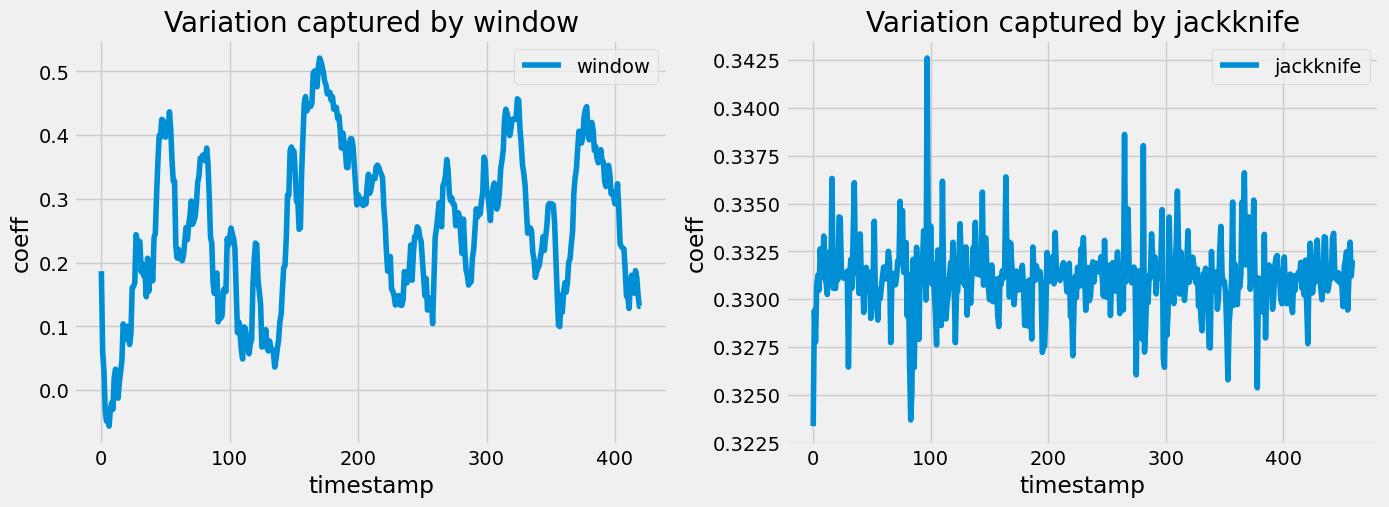

In [27]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

for i in range(2):
    if i == 0:
        ax[i].plot(dFC_rest[:,0,110], label='window')
    else:
        ax[i].plot(np.abs(dFC_rest2[:,0,110]), label='jackknife')
    ax[i].set_xlabel('timestamp')
    ax[i].set_ylabel('coeff')
    ax[i].legend()
    if i == 0:
        ax[i].set_title('Variation captured by window')
    else:
        ax[i].set_title('Variation captured by jackknife')

### Movie types comparison

In [22]:
mri_path = "./data/fmri400_compiled/Sintel_compiled.csv"
mri_df   = pd.read_csv(mri_path)
filename_movie         = 'TC_400_sub-S09_ses-1_Sintel.csv'
movie_series, movie_df = df_to_timeseries(mri_df, filename_movie)

In [23]:
# variable for dFC
ws   = 40
step = 1 # let's overlap pretty much all for now to see smoothness
nbr, nbt = movie_series.T.shape

In [25]:
dFC_movie = np.zeros((nbt // step + 1 - ws, nbr,nbr))

for c, sidx in enumerate(range(0, nbt, step)):
    T = movie_series[sidx:sidx+ws]
    if T.shape[0] != ws: 
        continue
    dFC_movie[c] = FC(T)

In [26]:
dFC_movie2 = np.zeros((nbt, nbr,nbr))
for sidx in range(0, nbt):
    # Jackknife sampling
    T = np.concatenate([movie_series[:sidx], movie_series[sidx+1:]])
    dFC_movie2[sidx] = -FC(T)

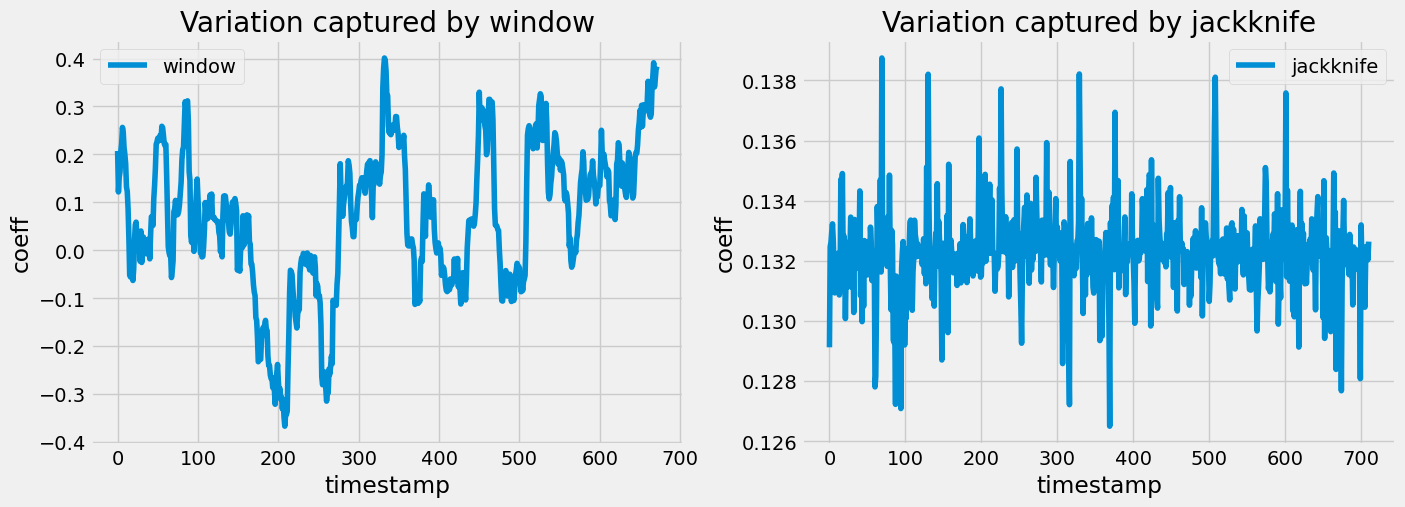

In [28]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

for i in range(2):
    if i == 0:
        ax[i].plot(dFC_movie[:,0,110], label='window')
    else:
        ax[i].plot(np.abs(dFC_movie2[:,0,110]), label='jackknife')
    ax[i].set_xlabel('timestamp')
    ax[i].set_ylabel('coeff')
    ax[i].legend()
    if i == 0:
        ax[i].set_title('Variation captured by window')
    else:
        ax[i].set_title('Variation captured by jackknife')

Quick Note: It seems Jaccknife does give high time resolution but we don't necessarily see a trend unlike standard window method. We will be using Standard Window for now.